### nanana

In [2]:
# %load rnd_img.py


import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import random
from scipy import spatial
import time

number_processes = multiprocessing.cpu_count()
N = 4*multiprocessing.cpu_count()

def gen_rnd_sparse(w, h):
    """
    Create an empty array and fill it with random data but with many zero-values.
    """
    # Give the matrix/array dimmensions
    #w, h = 512, 512

    # Creathe the matrix
    data = np.zeros((w, h, 3), dtype=np.uint8)
    
    # Fill the matrix with random color values
    for i in range(0, w, 2):
        for j in range(0, h, 2):
            r = random.randint(0, 50)
            g = random.randint(0, 100)
            b = random.randint(0, 255)
            data[i][j] = [r, g, b]
    return data

def gen_rnd_ar(w, h):
    """
    Same as above but whole matrix is populated.
    """
    data = np.zeros((w, h, 3), dtype=np.uint8)
    for i in range(0, w):
        for j in range(0, h):
            r = random.randint(0, 50)
            g = random.randint(0, 100)
            b = random.randint(0, 255)
            data[i][j] = [r, g, b]
    return data


def fill_rgb(in_ar, w, h):
    """
    For debug mostly - fill each quarter of the matrix with different colour.
    """
    col_val = 140
    for x in range(0, int(w/2)):
        for y in range(0, int(h/2)):
            in_ar[x][y] = [col_val, 0, 0]
    for x in range(0, int(w/2)):
        for y in range(int(h/2), h):
            in_ar[x][y] = [0, col_val, 0]
    for x in range(int(w/2), w):
        for y in range(0, int(h/2)):
            in_ar[x][y] = [0, 0, col_val]
    for x in range(int(w/2), w):
        for y in range(int(h/2), h):
            in_ar[x][y] = [col_val, col_val, col_val]

def show_img(data):
    """
    Display the image using matplotlib.
    """
    
    norm = plt.Normalize()
    data = norm(data)
    plt.imshow(data)
    plt.title("random")
    plt.show(block=False)
    plt.pause(1e-3)

def ar_brigh(in_array):
    rgbi = 0
    
    #w = len(in_array)
    #h = len(in_array[0])
    #print(nxy, w, h)
    print("begin")
    """
    for x in range(0, w-1):
        for y in range(0, h-1):
            if np.array_equal(in_array[x][y], [0, 0, 0]) == True:
    """
    for it1 in in_array:
        for it2 in it1:
            for rgbv in it2:
                eps = random.randint(0, 2)
                it2[rgbi] += eps
                #print(rgbv, eps, asdx)
                rgbi += 1
            rgbi = 0

def ar_rgb_sel(in_array, col):
    """
    Select a channel from rgb as an argument.
    Iterate through each element and add a random
    value to each element increasing the chosen channel.
    """
    
    for i in range(10):
        chval = 2
    
        if col == "0":
            for it1 in in_array:
                for it2 in it1:
                    for rgbv in it2:
                        eps = random.randint(0, chval)
                        it2[0] += eps
        elif col == "1":
            for it1 in in_array:
                for it2 in it1:
                    for rgbv in it2:
                        eps = random.randint(0, chval)
                        it2[1] += eps
        elif col == "2":
            for it1 in in_array:
                for it2 in it1:
                    for rgbv in it2:
                        eps = random.randint(0, chval)
                        it2[2] += eps
        elif col == "3":
            for it1 in in_array:
                for it2 in it1:
                    for rgbv in it2:
                        eps = random.randint(0, chval)
                        it2[0] += eps
                        it2[1] += eps
                        it2[2] += eps
        else:
            pass
    return in_array

def rgb_norm(in_array, w, h):
    out_array = np.zeros((w, h, 3), dtype=np.uint8)
    for i in range(0, w):
        for j in range(0, h):
            out_array[i][j] = in_array[i][j]
    return out_array
    

def split_ar(in_array, xyz):
    out_ar = []
    # Divide the array in 2 along the x axis:
    n1 = np.split(in_array, N, axis = xyz)
    for i in n1:
        out_ar.append(i)
    return out_ar

def join_ar(array_list, xyz):
    ay_join1 = np.concatenate(array_list, axis = xyz)
    return ay_join1

def exec_multi(in_ar, fname):
    a_split = {}
    args = []
    
    for i in range(N):
        a_split[i] = ar_s[i]
        tmpv = (in_ar[i], str(i%4))
        args.append(tmpv)
    
    
    number_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(number_processes)
    total_tasks = 4*4
    tasks = range(total_tasks)
        
    results = pool.starmap(fname, args)
    pool.close()
    pool.join()
    
    out_ar = []
    for elem in results:
        out_ar.append(elem)
    return out_ar



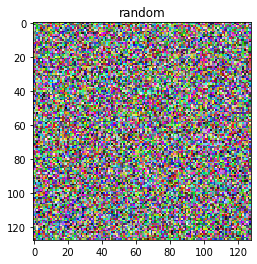

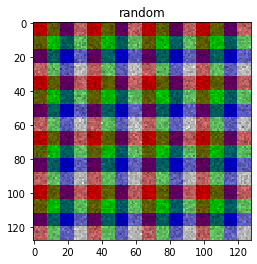

In [3]:
x = 128
y = 128
####img1 = gen_rnd_ar(x, y)
#img1 = np.zeros((x, y, 3), dtype=np.uint8)
#fill_rgb(img1, x, y)
#img1 = gen_rnd_sparse(x, y)
img1 = np.random.rand(x, y, 3)
#img1 = gen_rnd_ar(x, y)

show_img(img1)
#print(img1.shape)


ar_s = split_ar(img1, 0)
out_ar = exec_multi(ar_s, ar_rgb_sel)
final_array = join_ar(out_ar, 0)

ar_s = split_ar(final_array, 1)
out_ar = exec_multi(ar_s, ar_rgb_sel)
final_array = join_ar(out_ar, 1)

final_array = rgb_norm(final_array, x, y)

show_img(final_array)

pt = [0, 0, 0]
#pfound = final_array[spatial.KDTree(final_array).query(pt)[1]]

#final_array = join_ar(ar_s)
#show_img(final_array)

#show_img(img1)

#t_f = time.clock()
#print(t_f-t_s)
